In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load the Airbnb listings dataset from a CSV file
airbnb = pd.read_csv("dataset/listings.csv")
airbnb

id             neighbourhood        room_type  accommodates  \
0     1.318800e+04                Riley Park  Entire home/apt             4   
1     1.335800e+04                  Downtown  Entire home/apt             2   
2     1.349000e+04  Kensington-Cedar Cottage  Entire home/apt             2   
3     1.426700e+04  Kensington-Cedar Cottage  Entire home/apt             4   
4     1.625400e+04          Hastings-Sunrise  Entire home/apt             4   
...            ...                       ...              ...           ...   
4981  9.970000e+17                  Downtown  Entire home/apt             4   
4982  9.970000e+17              South Cambie  Entire home/apt             4   
4983  9.970000e+17              South Cambie     Private room             2   
4984  9.970000e+17                  Downtown  Entire home/apt             4   
4985  9.980000e+17         Downtown Eastside  Entire home/apt             2   

      bathrooms  bedrooms  beds  price  
0           1.0       0.0   2.0     14  
1           1.0       1.0   1.0     20  
2           1.0       1.0   1.0     35  
3           1.0       1.0   2.0     35  
4           1.0       2.0   3.0     36  
...         ...       ...   ...    ...  
4981        1.0       1.0   2.0   3000  
4982        NaN       2.0   NaN   5714  
4983        1.0       1.0   0.0   8495  
4984        NaN       2.0   NaN   9600  
4985        1.0       1.0   0.0   9999  

[4986 rows x 8 columns]

In [6]:
# Calculate and return the average price from the "price" column in the Airbnb dataset
airbnb["price"].mean()

np.float64(249.16526273565984)

In [8]:
# Set the random seed to 100 for reproducibility
np.random.seed(100)

# Randomly select a sample of 40 rows from the Airbnb dataset and calculate the average price from the "price" column
airbnb.sample(n=40)["price"].mean()

np.float64(222.875)

In [18]:
# Since no random seed is set, running this multiple times will result in different mean values.
airbnb.sample(n=40)["price"].mean()

np.float64(242.5)

In [19]:
# Initialize an empty list to store the samples
sample_list = []

for i in range(20_000):
    sample=airbnb.sample(n=40)
    sample=sample.assign(replicate = i)
    sample_list.append(sample)
    

In [20]:
samples= pd.concat(sample_list)
samples

id      neighbourhood        room_type  accommodates  \
4947  9.920000e+17           Downtown  Entire home/apt            10   
3548  7.490000e+17   Hastings-Sunrise  Entire home/apt             2   
3848  8.150000e+17           Downtown  Entire home/apt             5   
4120  8.700000e+17           Downtown  Entire home/apt             2   
2973  6.180000e+17          Kitsilano  Entire home/apt             5   
...            ...                ...              ...           ...   
3169  6.670000e+17             Sunset  Entire home/apt             6   
4159  8.760000e+17  Dunbar Southlands     Private room             2   
2092  4.336422e+07          Kitsilano  Entire home/apt             5   
37    4.641720e+05   Hastings-Sunrise  Entire home/apt             4   
3775  7.980000e+17           Downtown  Entire home/apt             5   

      bathrooms  bedrooms  beds  price  replicate  
4947        NaN       5.0   NaN   1200          0  
3548        1.0       1.0   1.0    268          0  
3848        2.0       3.0   3.0    300          0  
4120        1.0       1.0   1.0    348          0  
2973        NaN       2.0   NaN    220          0  
...         ...       ...   ...    ...        ...  
3169        NaN       3.0   NaN    236      19999  
4159        1.0       1.0   1.0    350      19999  
2092        1.5       2.0   3.0    165      19999  
37          NaN       2.0   NaN     45      19999  
3775        2.0       2.0   3.0    295      19999  

[800000 rows x 9 columns]

In [22]:
sample_estimates=samples.groupby("replicate")["price"].mean().reset_index(name="sample_mean")
sample_estimates

replicate  sample_mean
0              0      303.525
1              1      216.775
2              2      200.300
3              3      269.600
4              4      247.350
...          ...          ...
19995      19995      251.575
19996      19996      186.150
19997      19997      304.750
19998      19998      288.050
19999      19999      249.350

[20000 rows x 2 columns]

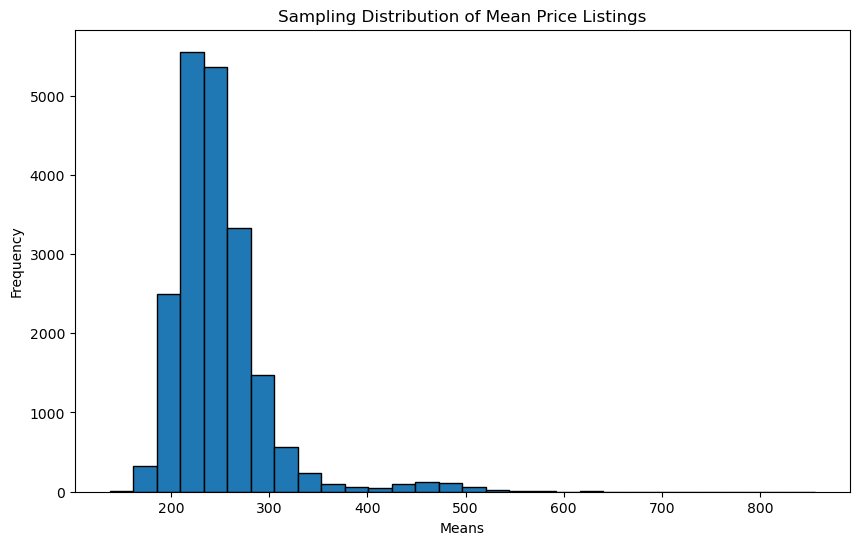

In [23]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [24]:
sample_estimates["sample_mean"].mean()

np.float64(248.73100499999998)

**Bootstrap**


In [27]:
np.random.seed(1234)
one_sample = airbnb.sample(n=40)
#one_sample

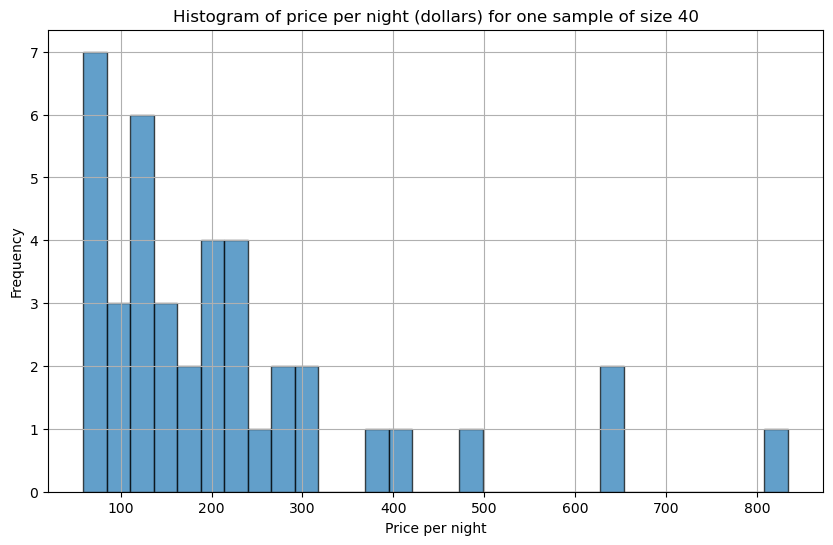

In [28]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [31]:
one_sample["price"].mean()

np.float64(219.85)

In [32]:
boot1= one_sample.sample(frac=1, replace=True)

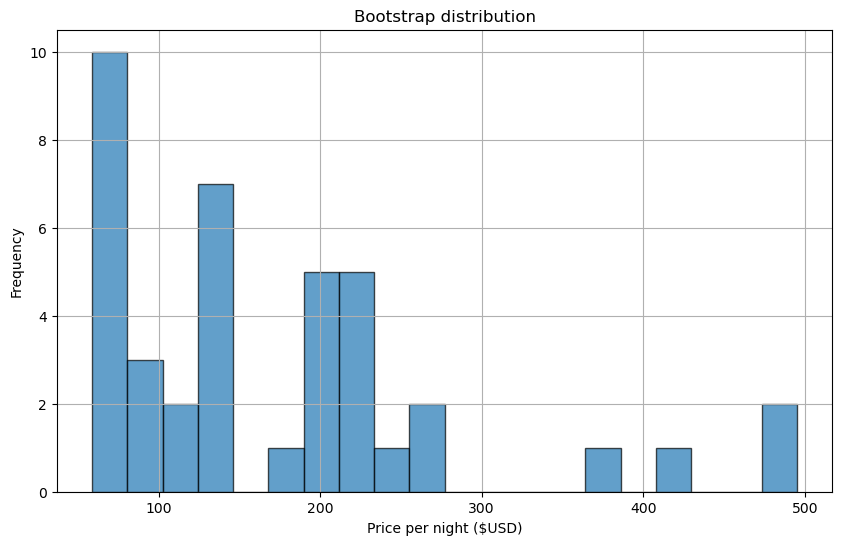

In [33]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [34]:
boot1['price'].mean()

np.float64(175.425)

In [36]:
bootstrap_samples=[]

for i in range(20000):
    sample=one_sample.sample(frac=1, replace=True)
    sample=sample.assign(replicate=i)
    bootstrap_samples.append(sample)

In [38]:
boot20000 = pd.concat(bootstrap_samples)
#boot20000

In [41]:
boot_means= boot20000.groupby('replicate')["price"].mean().reset_index(name='mean_price')
#boot_means

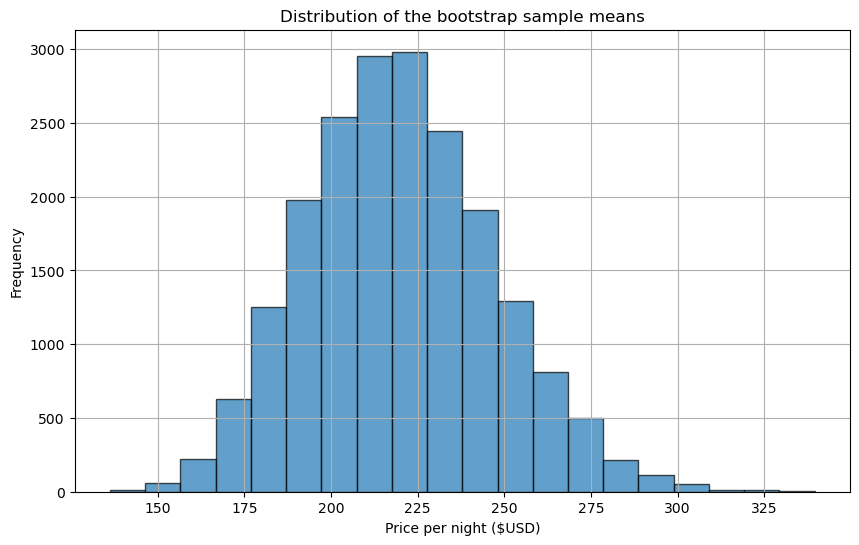

In [42]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of the bootstrap sample means')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [43]:
ci_bounds= boot_means["mean_price"].quantile([0.025,0.975])
ci_bounds

0.025    171.248750
0.975    276.300625
Name: mean_price, dtype: float64